# <font color = "red">Classificação de Risco de Crédito</font>

## Análise Exploratória dos Dados e Engenharia de Atributos

<font color = "red">Problema de Negócio:</font> A partir de dados históricos, irei verificar os padrões que levaram os clientes de uma instituição financeira, a adentrarem, ou não, na situação de inadimplência, para posteriormente criar um 

<font color = "red">Meta de Acurácia Final:</font> ACC mínimo de 88%

<font color = "Green">Nesta etapa, de fato iniciarei a exploração dos dados, a fim de entender padrões, gerar insights valiosos, compreender o relacionamento entre variáveis, etc, além de realizar toda a engenharia de atributos que for necessária

In [2]:
# Imports 
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath('..'))
from utils import *

In [3]:
# Importando os dados 
df = pd.read_csv("C:/Projetos Pessoais/DataScience/analise_Risco_Credito/data/df_tratado_sem_outliers_3.csv")

# Anotações deste Jupyter Notebook

## Correlação Variáveis Numéricas
- Idade - Duracao_Historico_Credito (0.74)

- Comprometimento_Renda - Valor (0.64)

- 

## Variáveis Numéricas
- A discrepância de adim e inadim para valores altos de crédito é muito menor, indicando que, quanto maior o valor, maior a chance de inadimplÊncia; 

- Taxa de Juros idem;

- Comprometimento Renda idem;

- Demais variáveis se mostraram equivalentes, no que tange às classes.

## Variáveis Categóricas
- Número de inadimplentes reincidentes, ou seja, que já possuiam inadimplência histórica e não realizaram o pagamento do novo (36% do total) - ou seja, risco extremamente alto entre as pessoas que possuem inadimplência histórica (1/3)

- % de inadimplentes por tipo_moradia:
  - Aluguel -> 27% 
  - Hipoteca -> 12%
  - Própria -> 6%

- Grau de Empréstimo (estudarei mais): 
    - Empréstimos "A", "B" e "C" não possuem adimplência maior que o posto, já as categorias "D", "E", "F" e "G" possuem inadimplência maior que as anteriores;
    - Taxa média de empréstimo A(7.33%), B(11%), C(13.45%), D(15.35%), E(16.88%), F(18.52%) e G(19.89)

- Motivos para o Empréstimo:
    - Todos possuem inadimplência variando de 12% a 18%;
    - Consolidação de dívidas e Reformas domésticas possuem inadimplÊncia maior, na casa de 25%

In [4]:
df.sample(5)

,Idade,Renda_Anual,Tipo_Moradia,Anos_no_Emprego,Motivo_Emprestimo,Grau_Emprestimo,Valor,Taxa_Juros,Status_Pagamento,Comprometimento_Renda,Inadimplencia_Historica,Duracao_Historico_Credito
13109,25.0,54996.0,Hipoteca,0.0,Reformas Domésticas,A,10000.0,8.94,0,0.18,Não,4.0
17983,28.0,75000.0,Aluguel,4.0,Consolidação Dívidas,B,8400.0,11.14,1,0.11,Não,5.0
11049,26.0,71400.0,Próprio,9.0,Médico,E,16500.0,16.45,1,0.20,Não,3.0
15690,27.0,35004.0,Aluguel,7.0,Médico,B,5000.0,10.75,0,0.14,Não,8.0
13733,24.0,40944.0,Aluguel,0.0,Médico,B,8200.0,11.36,0,0.20,Não,4.0


In [5]:
# transformando a classe alvo em object
df['Status_Pagamento'] = df['Status_Pagamento'].astype("object")

In [6]:
df.shape

(21733, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21733 entries, 0 to 21732
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Idade                      21733 non-null  float64
 1   Renda_Anual                21733 non-null  float64
 2   Tipo_Moradia               21733 non-null  object 
 3   Anos_no_Emprego            21733 non-null  float64
 4   Motivo_Emprestimo          21733 non-null  object 
 5   Grau_Emprestimo            21733 non-null  object 
 6   Valor                      21733 non-null  float64
 7   Taxa_Juros                 21733 non-null  float64
 8   Status_Pagamento           21733 non-null  object 
 9   Comprometimento_Renda      21733 non-null  float64
 10  Inadimplencia_Historica    21733 non-null  object 
 11  Duracao_Historico_Credito  21733 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.0+ MB


In [8]:
df.describe()

,Idade,Renda_Anual,Anos_no_Emprego,Valor,Taxa_Juros,Comprometimento_Renda,Duracao_Historico_Credito
count,21733.00000,21733.000000,21733.000000,21733.000000,21733.000000,21733.000000,21733.000000
mean,25.87917,56927.122993,4.340726,8177.271891,10.903814,0.157164,4.637372
std,3.56354,24864.075855,3.347297,4626.597479,3.177838,0.086168,2.479394
min,20.00000,4080.000000,0.000000,500.000000,5.420000,0.010000,2.000000
25%,23.00000,38000.000000,2.000000,4800.000000,7.880000,0.090000,3.000000
50%,25.00000,53000.000000,4.000000,7200.000000,10.990000,0.140000,4.000000
75%,28.00000,72000.000000,7.000000,11000.000000,13.230000,0.210000,6.000000
max,35.00000,127000.000000,14.000000,20150.000000,21.140000,0.390000,10.000000


Separando variaveis numéricas, categoricas e target

In [9]:
variaveis_categoricas = ['Tipo_Moradia', 'Motivo_Emprestimo', 'Grau_Emprestimo', 'Inadimplencia_Historica']

variaveis_numericas = ['Idade','Renda_Anual','Anos_no_Emprego',
                       'Valor','Taxa_Juros','Comprometimento_Renda',
                       'Duracao_Historico_Credito']

target = ['Status_Pagamento']

# <font color = "red"> --------

# Verificando Relacionamento das Variáveis Numéricas

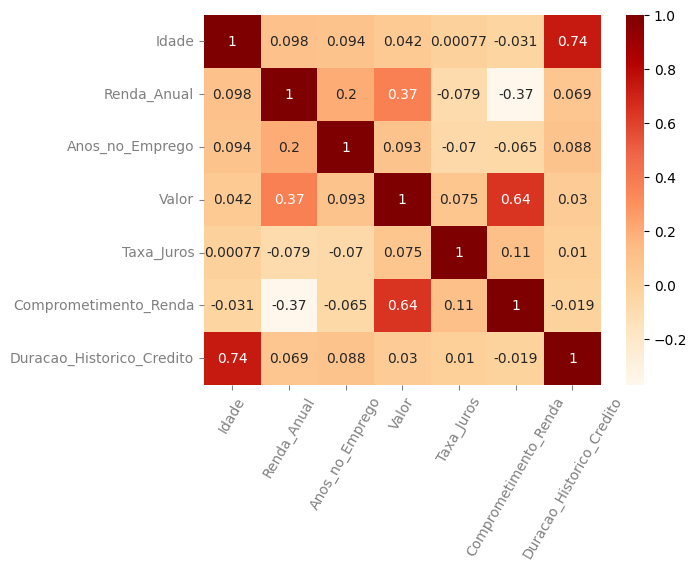

In [10]:
# Verificando Correlação
correlation_matrix = df[variaveis_numericas].corr()
sns.heatmap(data=correlation_matrix, annot=True, cmap='OrRd')
plt.tick_params(axis='x', colors='grey', rotation = 60)  # Ticks do eixo x
plt.tick_params(axis='y', colors='grey')  # Ticks do eixo y

# Exibe o gráfico
plt.show()

In [11]:
df['Status_Pagamento'] = df['Status_Pagamento'].replace({0: 'Adimplente', 1: 'Inadimplente'})

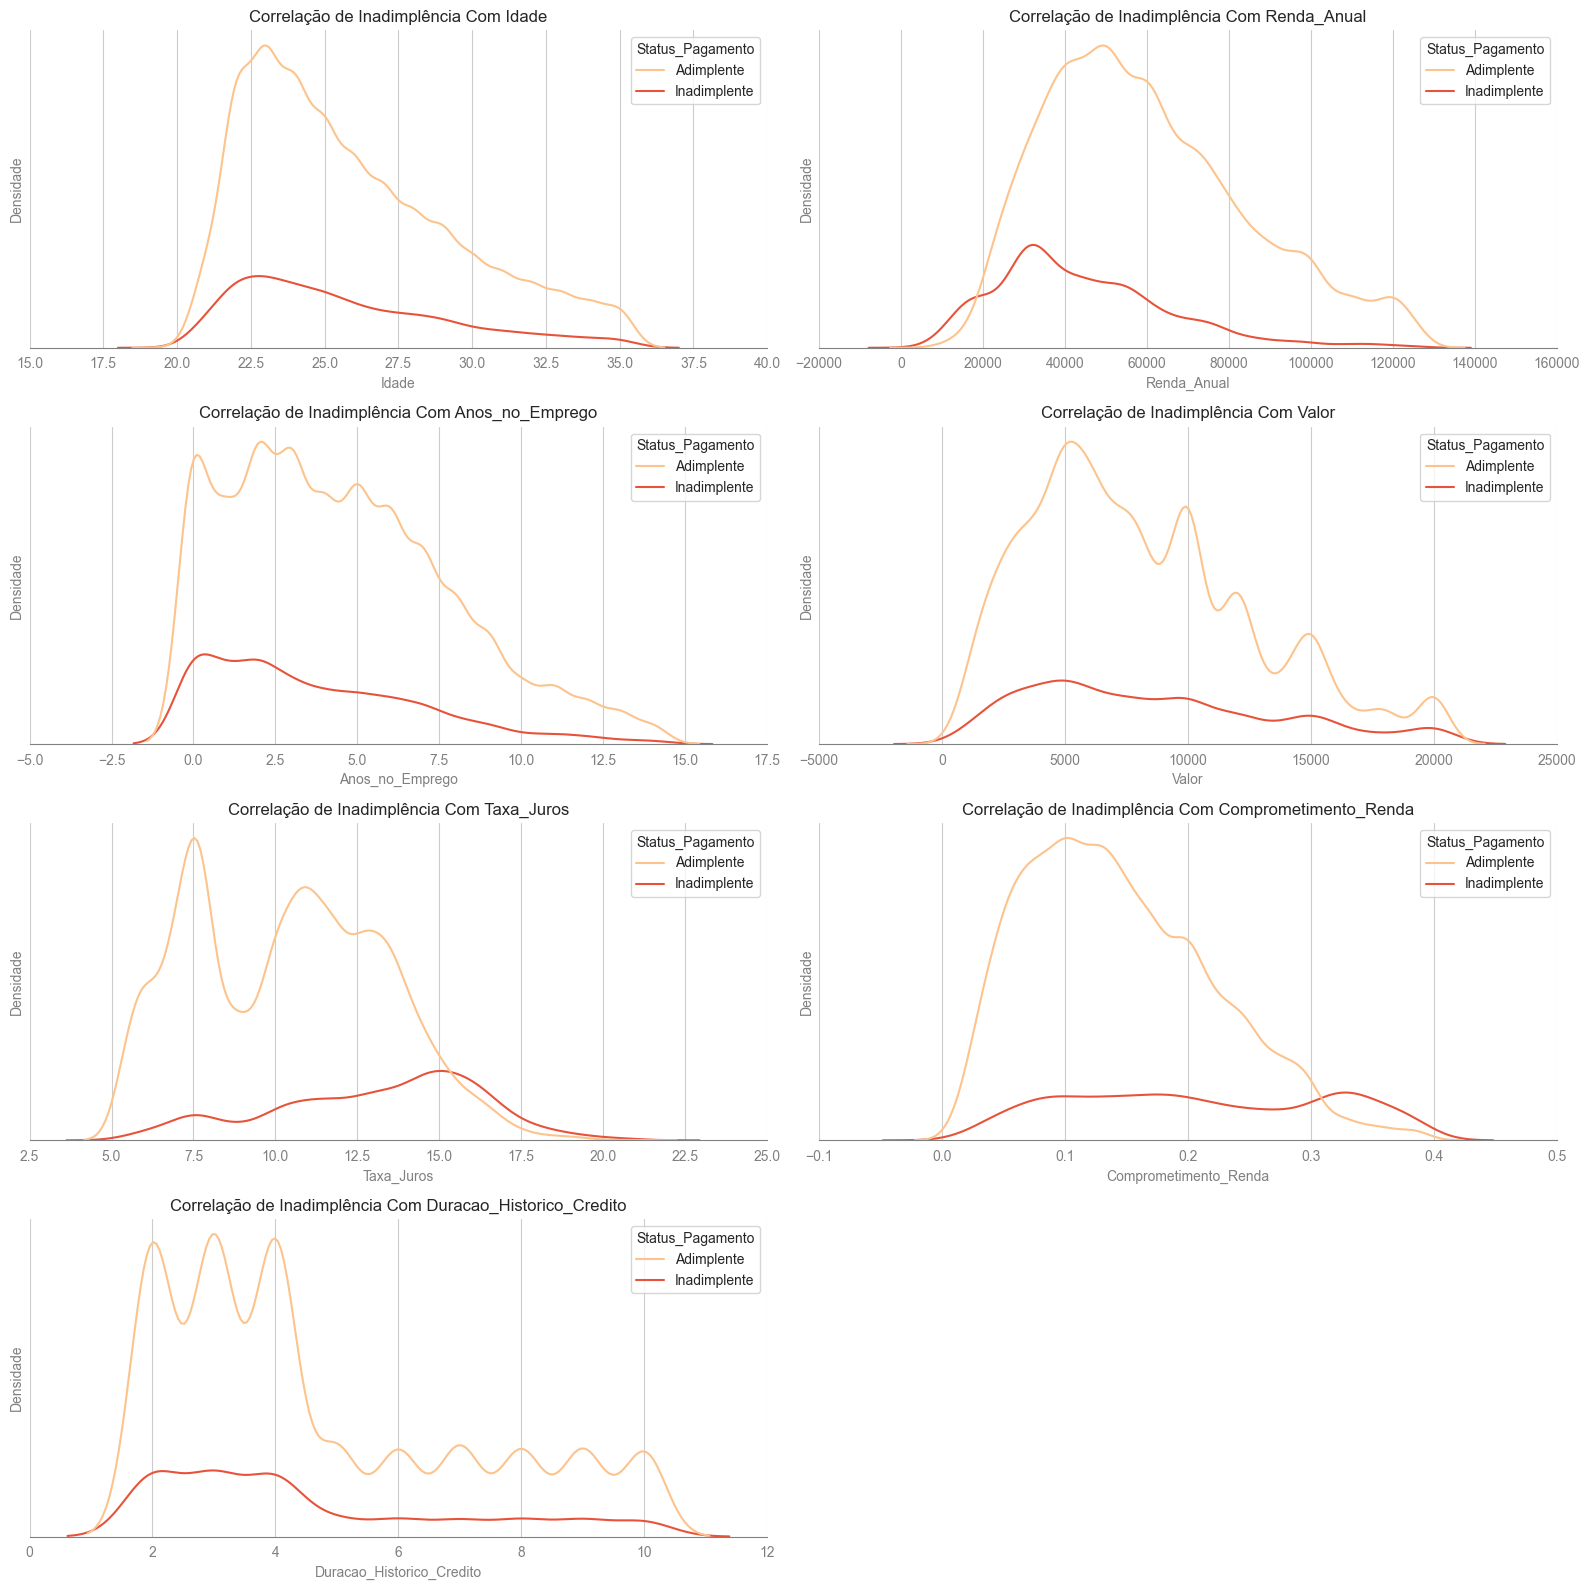

In [13]:
import math


num_variaveis = len(variaveis_numericas)
num_colunas = 2
num_linhas = math.ceil(num_variaveis / num_colunas)  # Calcula o número de linhas

fig, axes = plt.subplots(num_linhas, num_colunas, figsize=(16, 4 * num_linhas))  # Cria uma grid de subplots

# Achata o array de eixos se houver mais de 1 linha, para fácil iteração
axes = axes.flatten() if num_linhas > 1 else [axes]

for i, variavel in enumerate(variaveis_numericas):
    ax = axes[i]
    sns.kdeplot(data=df, x=variavel, hue='Status_Pagamento', palette='OrRd', ax=ax)
    
    ax.set_title(f"Correlação de Inadimplência Com {variavel}")
    ax.set_xlabel(variavel, color='grey')
    ax.set_ylabel('Densidade', color='grey')
    ax.set_xticks(ax.get_xticks())
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')

    # Remover as linhas de cima e do lado direito
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('grey')

    # Remover as linhas do lado esquerdo
    ax.spines['left'].set_visible(False)
    
    # Definir a cor das linhas do eixo y e x como cinza
    ax.spines['bottom'].set_color('grey')
    
    # Remover os ticks do eixo y
    ax.set(yticks=[])
    ax.tick_params(left=False)

# Remove os eixos vazios, se houver mais subplots do que gráficos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Organiza os subplots para melhor ajuste
plt.show()

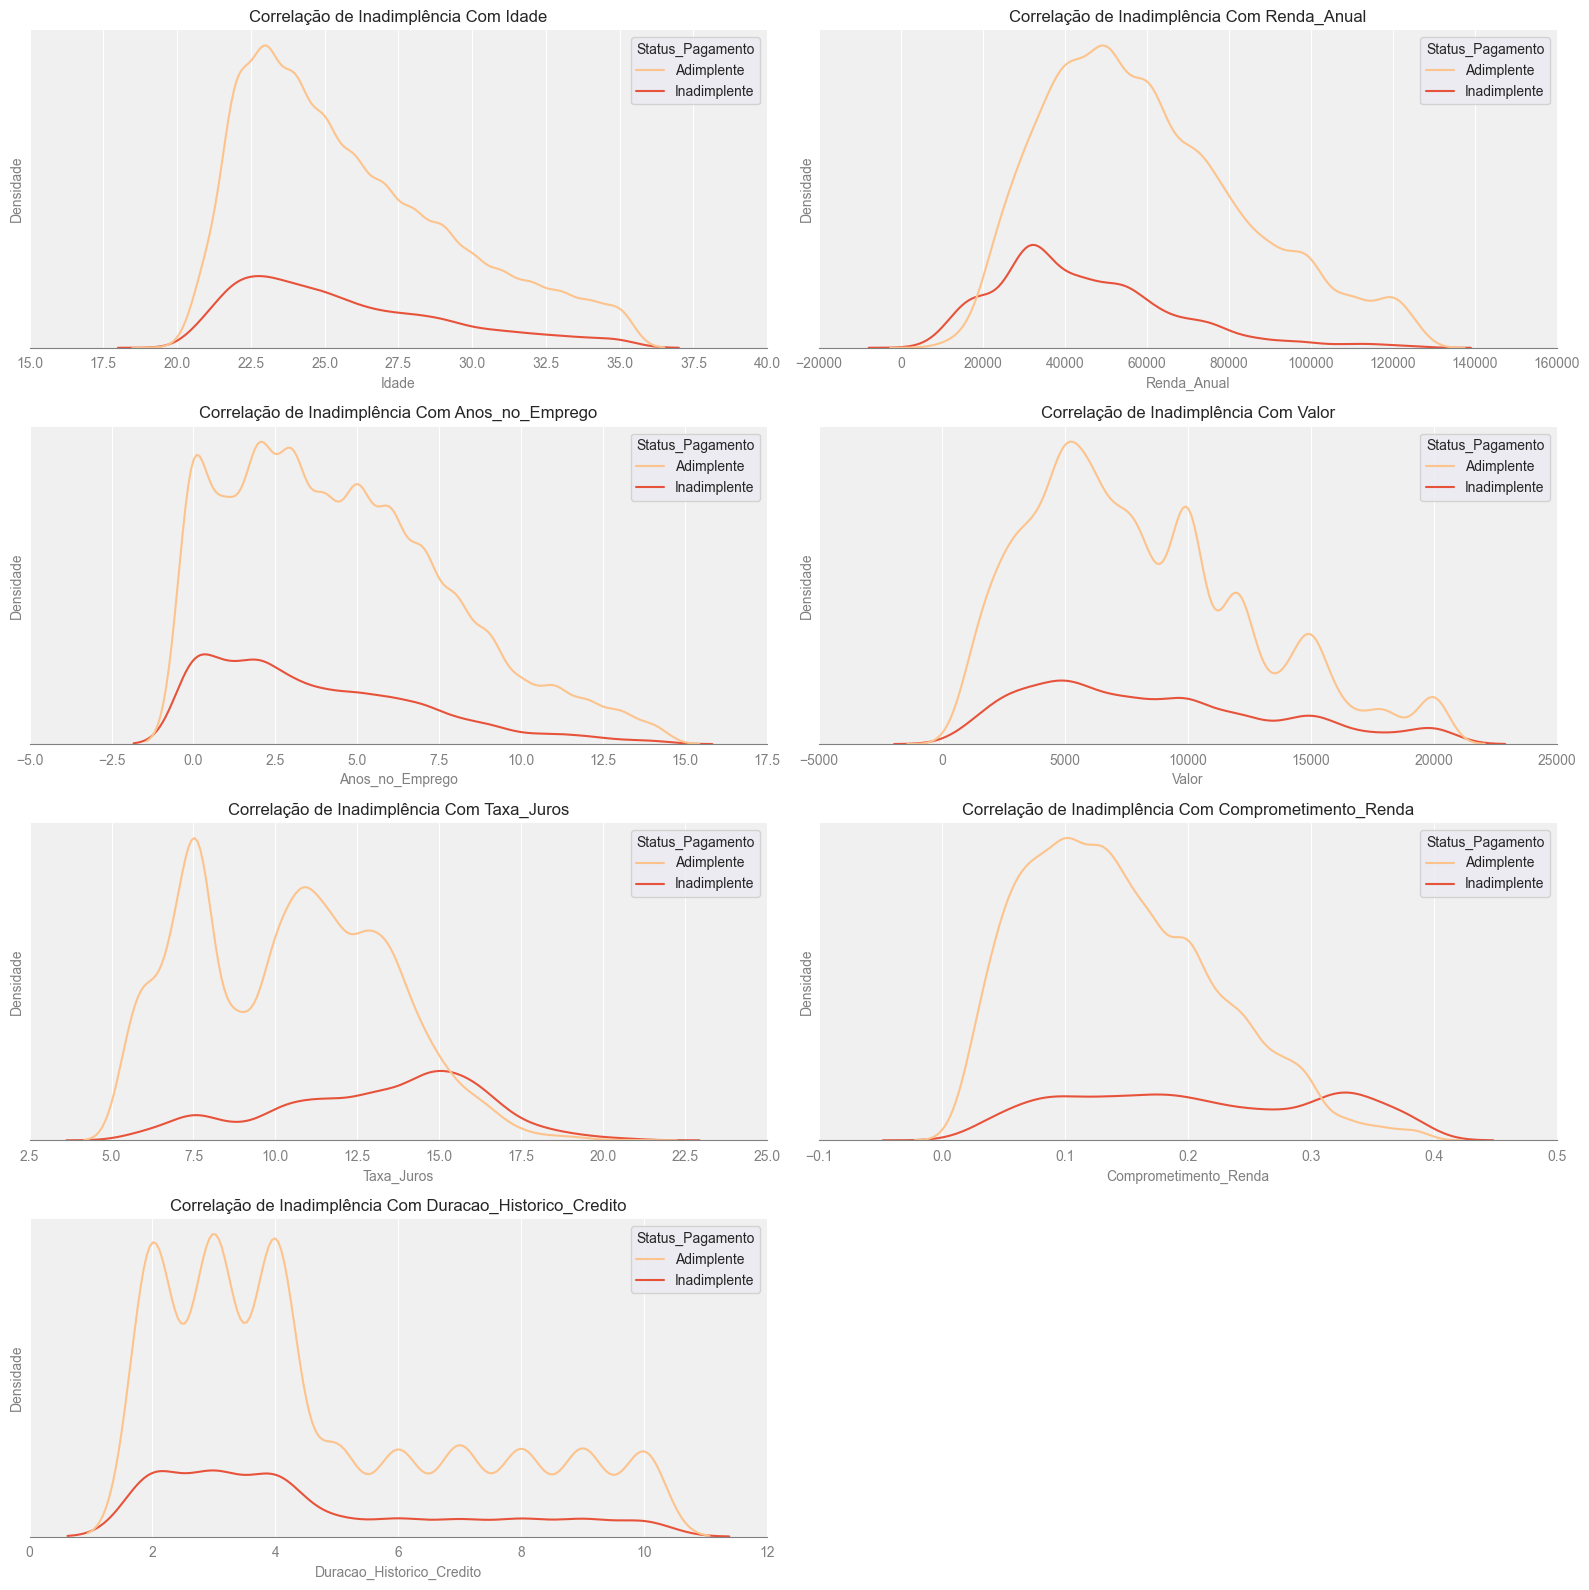

In [16]:
sns.set_style("darkgrid")

num_variaveis = len(variaveis_numericas)
num_colunas = 2
num_linhas = math.ceil(num_variaveis / num_colunas)  # Calcula o número de linhas

fig, axes = plt.subplots(num_linhas, num_colunas, figsize=(16, 4 * num_linhas))  # Cria uma grid de subplots

# Achata o array de eixos se houver mais de 1 linha, para fácil iteração
axes = axes.flatten() if num_linhas > 1 else [axes]

for i, variavel in enumerate(variaveis_numericas):
    ax = axes[i]
    sns.kdeplot(data=df, x=variavel, hue='Status_Pagamento', palette='OrRd', ax=ax)
    
    ax.set_title(f"Correlação de Inadimplência Com {variavel}")
    ax.set_xlabel(variavel, color='grey')
    ax.set_ylabel('Densidade', color='grey')
    ax.set_xticks(ax.get_xticks())
    ax.tick_params(axis='x', colors='grey')
    ax.tick_params(axis='y', colors='grey')

    # Remover as linhas de cima e do lado direito
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('grey')

    # Remover as linhas do lado esquerdo
    ax.spines['left'].set_visible(False)
    
    # Definir a cor das linhas do eixo y e x como cinza
    ax.spines['bottom'].set_color('grey')
    
    # Remover os ticks do eixo y
    ax.set(yticks=[])
    ax.tick_params(left=False)
    ax.set_facecolor('#f0f0f0')  # Cinza bem claro

# Remove os eixos vazios, se houver mais subplots do que gráficos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Organiza os subplots para melhor ajuste
plt.show()

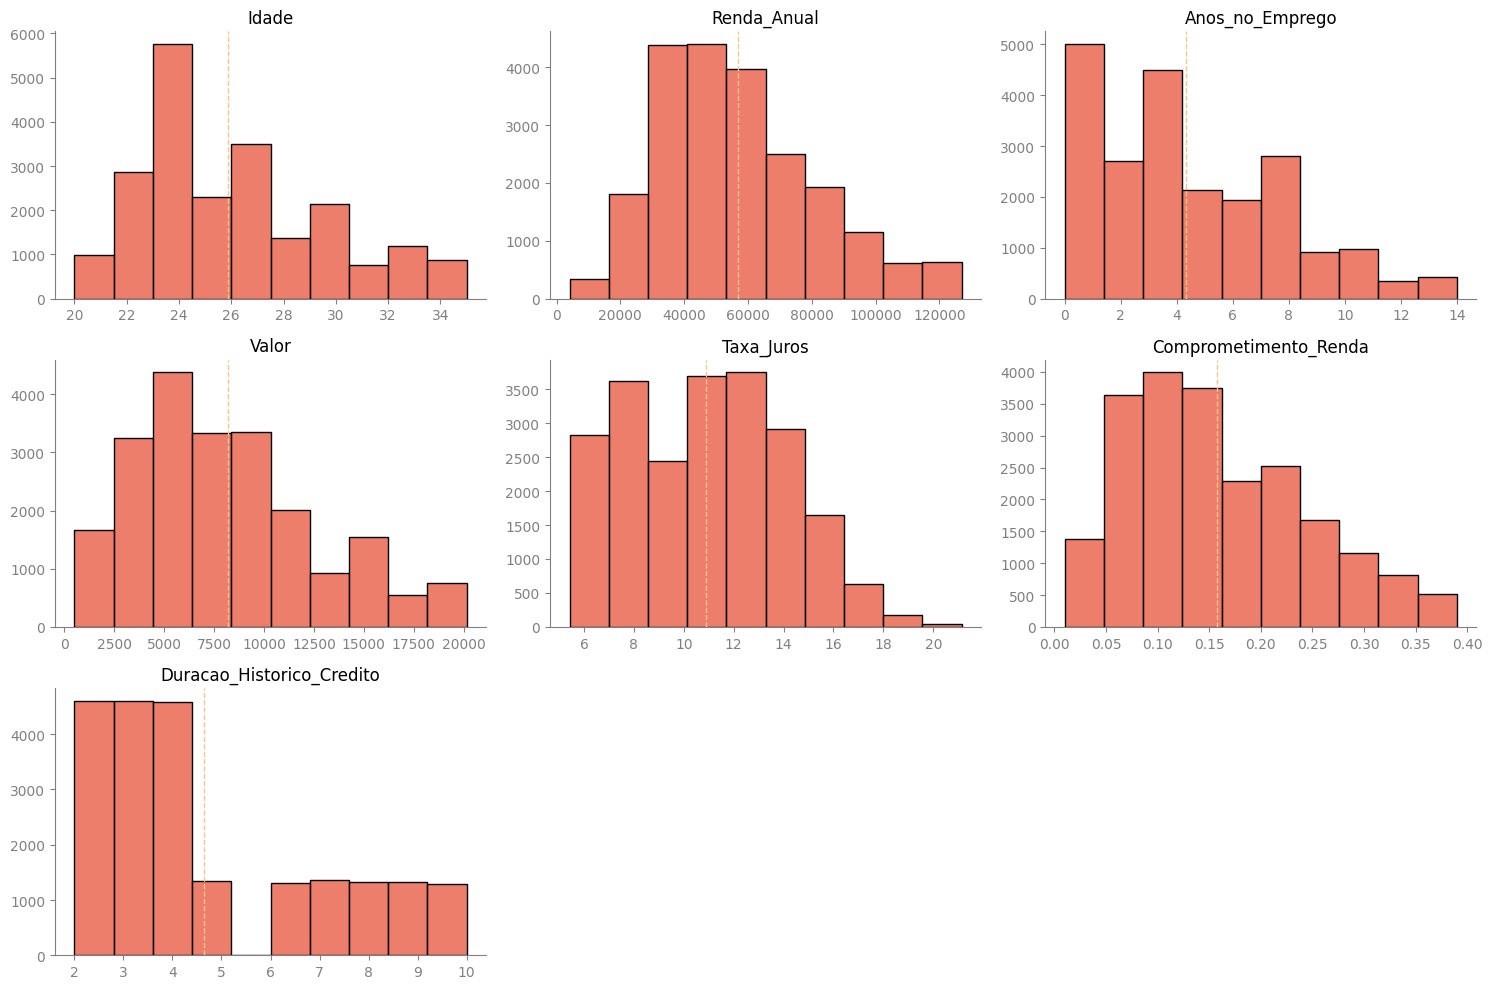

In [12]:

# Número de variáveis numéricas
num_variaveis = len(variaveis_numericas)
num_colunas = 3
num_linhas = math.ceil(num_variaveis / num_colunas)  # Calcula o número de linhas necessário

fig, axes = plt.subplots(num_linhas, num_colunas, figsize=(15, 10))  # Ajusta o tamanho da figura para acomodar 7 gráficos

palette = sns.color_palette("OrRd", n_colors=2)

# Achata os eixos se houver mais de uma linha
axes = axes.flatten() if num_linhas > 1 else [axes]

# Remove as bordas dos subplots e ajusta as cores dos eixos
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    ax.tick_params(axis='both', colors='grey')  # Ajusta a cor dos ticks nos eixos

# Loop para criar gráficos de histograma para cada variável numérica
for i, num in enumerate(variaveis_numericas):
    sns.histplot(data=df, x=num, bins=10, ax=axes[i], color="#e7533a")
    axes[i].set_title(num)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    # Adiciona uma linha vertical na média de cada gráfico
    mean_value = df[num].mean()
    axes[i].axvline(mean_value, color=palette[0], linestyle='dashed', linewidth=1)

# Remove eixos vazios se houver mais subplots do que gráficos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajusta o layout dos subplots
plt.tight_layout()

# Exibe os gráficos
plt.show()

# <font color = "purple"> --------

# Verificando Relacionamento das Variáveis Categóricas

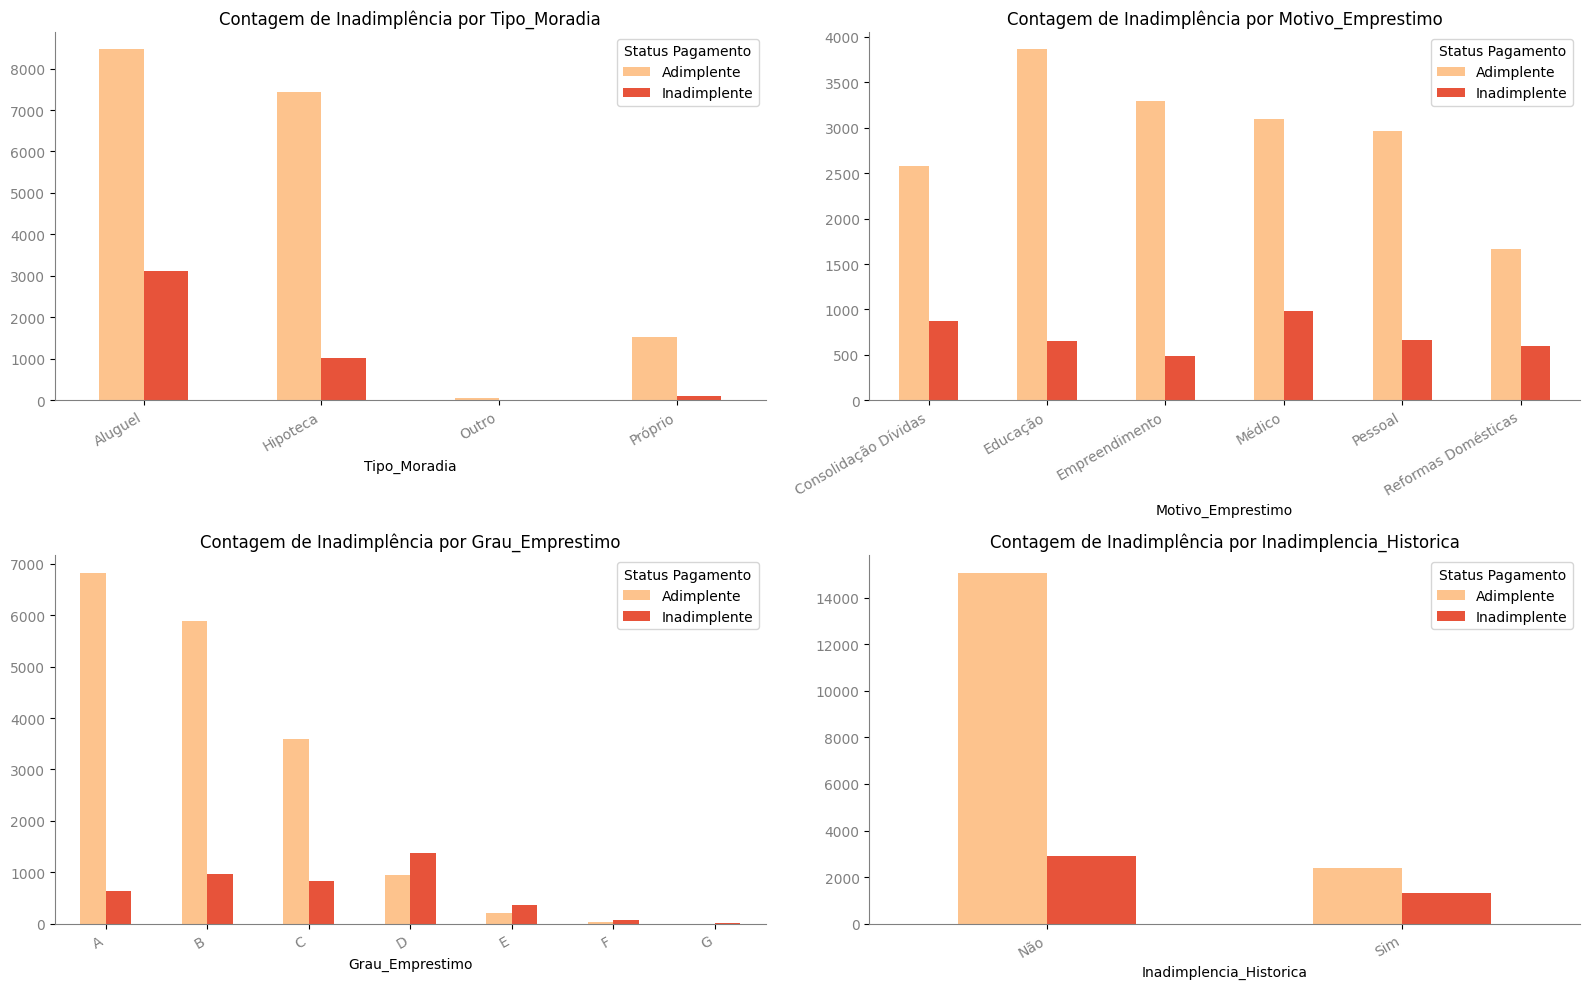

In [13]:

# Configurando a paleta de cores
palette = sns.color_palette("OrRd", n_colors=2)

# Definir número de colunas e calcular o número de linhas
num_colunas_por_linha = 2  # Mudança: 2 gráficos por linha
num_linhas = (len(variaveis_categoricas) + num_colunas_por_linha - 1) // num_colunas_por_linha

# Criar subplots
fig, axes = plt.subplots(num_linhas, num_colunas_por_linha, figsize=(16, 5 * num_linhas))
fig.subplots_adjust(hspace=0.5)

# Iterar pelas colunas categóricas e criar os gráficos
for i, var_categoria in enumerate(variaveis_categoricas):
    row = i // num_colunas_por_linha
    col = i % num_colunas_por_linha
    
    # Criar uma tabela de contingência
    contingency_table = pd.crosstab(df[var_categoria], df['Status_Pagamento'])
    
    # Use o método bar do DataFrame para criar os gráficos com a paleta de cores
    ax = contingency_table.plot(kind='bar', ax=axes[row, col], color=palette)
    
    ax.set_title(f'Contagem de Inadimplência por {var_categoria}')
    ax.set_xlabel(var_categoria)
    ax.legend(title='Status Pagamento')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color('grey')
    ax.spines['bottom'].set_color('grey')
    
    # Aplique rotação nos rótulos do eixo x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', color='grey')
    ax.set_yticklabels(ax.get_yticklabels(), color='grey')

# Se houver subplots vazios, removê-los
for j in range(i + 1, num_linhas * num_colunas_por_linha):
    fig.delaxes(axes[j // num_colunas_por_linha, j % num_colunas_por_linha])

# Ajustar layout
plt.tight_layout()

# Exibir os gráficos
plt.show()

In [14]:
# Verificando proporções dentro das variáveis categóricas 

for i in variaveis_categoricas:
    group1 = df.groupby(i)['Status_Pagamento'].value_counts().reset_index()
    group2 = df.groupby(['Status_Pagamento'])['Status_Pagamento'].value_counts().reset_index()
    group3 = group1.merge(group2, on = 'Status_Pagamento')
    group4 = df.groupby(i)[i].value_counts().reset_index()
    group5 = group1.merge(group4, on = i)
    group5['Porcentagem (%)'] = round(group5['count_x'] / group5['count_y'] * 100, 2)
    group5.rename(columns = {'count_x': 'Total/Categoria', 'count_y':'Total Geral'}, inplace = True)

    print(f"\n\t\tPanorama variável {i}")
    print(group5)


		Panorama variável Tipo_Moradia
  Tipo_Moradia Status_Pagamento  Total/Categoria  Total Geral  Porcentagem (%)
0      Aluguel       Adimplente             8462        11586            73.04
1      Aluguel     Inadimplente             3124        11586            26.96
2     Hipoteca       Adimplente             7427         8450            87.89
3     Hipoteca     Inadimplente             1023         8450            12.11
4        Outro       Adimplente               53           69            76.81
5        Outro     Inadimplente               16           69            23.19
6      Próprio       Adimplente             1529         1628            93.92
7      Próprio     Inadimplente               99         1628             6.08

		Panorama variável Motivo_Emprestimo
       Motivo_Emprestimo Status_Pagamento  Total/Categoria  Total Geral  \
0   Consolidação Dívidas       Adimplente             2584         3456   
1   Consolidação Dívidas     Inadimplente              872        

Entendendo um pouco mais sobre a variável "Grau_Emprestimo"

In [18]:
df.Grau_Emprestimo.unique()

array(['B', 'A', 'D', 'C', 'E', 'F', 'G'], dtype=object)

In [19]:
# Loop for para identificar tx de juros para cada categoria de empréstimo
grau_LETRA = ["A","B","C","D","E","F","G"]

for grau in grau_LETRA:
 media_grau = df.loc[df["Grau_Emprestimo"] == grau, "Taxa_Juros"].mean()
 media_valor_emprestimo = df.loc[df["Grau_Emprestimo"] == grau, "Valor"].mean()
 media_comprometimento_renda = df.loc[df["Grau_Emprestimo"] == grau, "Comprometimento_Renda"].mean()
 print(f"Grupo '{grau}:'\
       \nTaxa Média de Empréstimo => {round(media_grau, 2)} %\
       \nValor Médio do Empréstimo => R$ {round(media_valor_emprestimo, 2)}\
       \nTaxa méida de comprometimento da renda => {round(media_comprometimento_renda,2)}\n")

Grupo 'A:'       
Taxa Média de Empréstimo => 7.33 %       
Valor Médio do Empréstimo => R$ 7767.77       
Taxa méida de comprometimento da renda => 0.15

Grupo 'B:'       
Taxa Média de Empréstimo => 11.01 %       
Valor Médio do Empréstimo => R$ 8334.38       
Taxa méida de comprometimento da renda => 0.16

Grupo 'C:'       
Taxa Média de Empréstimo => 13.45 %       
Valor Médio do Empréstimo => R$ 8136.79       
Taxa méida de comprometimento da renda => 0.16

Grupo 'D:'       
Taxa Média de Empréstimo => 15.35 %       
Valor Médio do Empréstimo => R$ 8507.19       
Taxa méida de comprometimento da renda => 0.17

Grupo 'E:'       
Taxa Média de Empréstimo => 16.88 %       
Valor Médio do Empréstimo => R$ 10013.05       
Taxa méida de comprometimento da renda => 0.18

Grupo 'F:'       
Taxa Média de Empréstimo => 18.52 %       
Valor Médio do Empréstimo => R$ 11044.95       
Taxa méida de comprometimento da renda => 0.19

Grupo 'G:'       
Taxa Média de Empréstimo => 19.89 %       
Va

In [30]:
# Salvando DF 
df.to_csv('../data/df_para_pre_processamento_4.csv', sep =',', index = False, encoding = 'utf-8')

### Agora continuarei o trabalho de pré processamento, onde verificarei a importância das variáveis 